# Titanic Survival Predicting System Using Machine Learning with Python

### Loading of libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

### Load the dataset

In [2]:
df = pd.read_csv('csv_files/Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check for how many row and column

In [4]:
print('Total Number of Row: {}'.format(df.shape[0]))
print('Total Number of Column: {}'.format(df.shape[1]))

Total Number of Row: 891
Total Number of Column: 12


### Check for missing value

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Drop Cabin column

In [6]:
df = df.drop('Cabin', axis=1)

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### Replace Age and Embark missing values with mean and model values respectively

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [9]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [10]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Check for statistical summary

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Check how many people survived and not survived

In [13]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
print('Total Number of people that survived: {}'.format(df['Survived'].value_counts()[1]))
print('Total Number of people that did not survived: {}'.format(df['Survived'].value_counts()[0])) 

Total Number of people that survived: 342
Total Number of people that did not survived: 549


Text(0.5, 1.0, 'Number of people that survived and not survived')

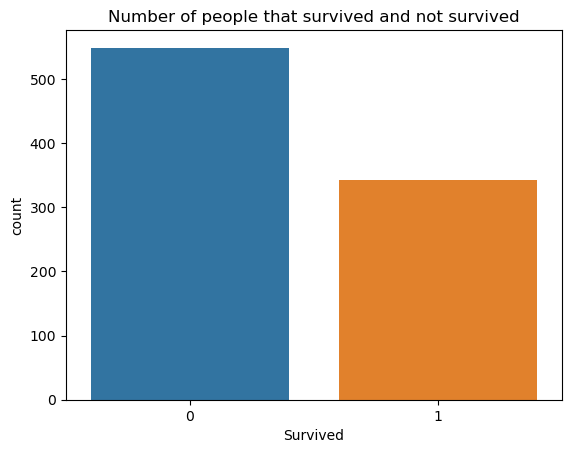

In [15]:
sns.countplot(x = 'Survived', data= df)
plt.title('Number of people that survived and not survived')

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [17]:
print('Total Number of Male: {}'.format(df['Sex'].value_counts()[0]))
print('Total Number of Female: {}'.format(df['Sex'].value_counts()[1])) 

Total Number of Male: 577
Total Number of Female: 314


Text(0.5, 1.0, 'Gender')

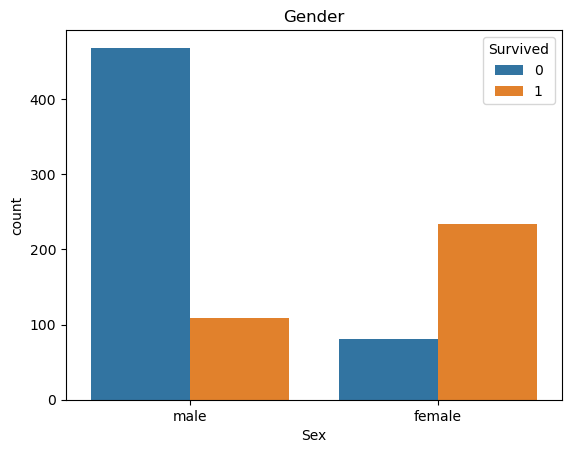

In [18]:
sns.countplot(x = 'Sex', hue='Survived', data=df)
plt.title('Gender')

Text(0.5, 1.0, 'Class of people')

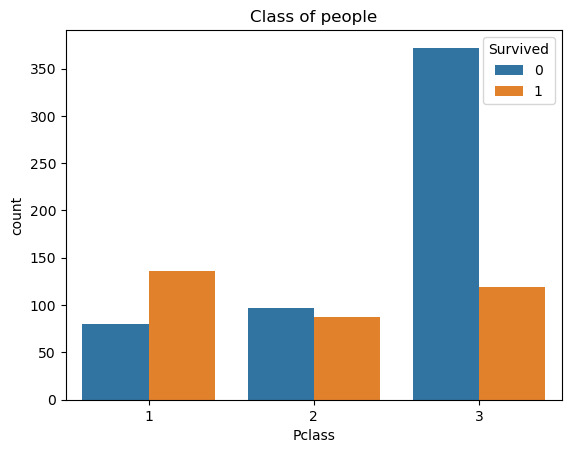

In [19]:
sns.countplot(x = 'Pclass', hue='Survived', data=df)
plt.title('Class of people')

In [20]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [22]:
df.replace({'Sex': {'male': 0, 'female': 1},
          'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


### Features

In [24]:
X = df.drop(['PassengerId', 'Name', 'Age', 'Ticket', 'Survived'], axis= 1)

### Target

In [25]:
y = df['Survived']

In [26]:
X

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,7.2500,0
1,1,1,1,0,71.2833,1
2,3,1,0,0,7.9250,0
3,1,1,1,0,53.1000,0
4,3,0,0,0,8.0500,0
...,...,...,...,...,...,...
886,2,0,0,0,13.0000,0
887,1,1,0,0,30.0000,0
888,3,1,1,2,23.4500,0
889,1,0,0,0,30.0000,1


In [27]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Splitting dataset into training data and test data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X.shape

(891, 6)

In [30]:
X_train.shape

(712, 6)

In [31]:
X_test.shape

(179, 6)

In [32]:
y_train.shape

(712,)

In [33]:
y_test.shape

(179,)

### Model: Logistic Regression

Training logistic regression model with training data

In [34]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

### Evaluate the performance of model

In [35]:
y_pred_train = logreg.predict(X_train)

In [36]:
#y_pred_train

* 1 stands for survived
* 0 stands for not survived

### Metrics Errors for logistic regression

In [37]:
y_train_accuracy = accuracy_score(y_train, y_pred_train)
print(y_train_accuracy)

0.8019662921348315


In [38]:
y_pred_test = logreg.predict(X_test)
y_test_accuracy = accuracy_score(y_test, y_pred_test)
print(y_test_accuracy)

0.7877094972067039


In [39]:
MAE = mean_absolute_error(y_test, y_pred_test)
RMSE = mean_squared_error(y_test, y_pred_test, squared=False)
print('Mean Absolute Error: {}'.format(MAE))
print('Root Mean Sqaured Error: {}'.format(RMSE))

Mean Absolute Error: 0.2122905027932961
Root Mean Sqaured Error: 0.46074993520704494


### Predicting Logistic Probability

In [40]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print(y_pred_prob[0])

0.10740973948172565


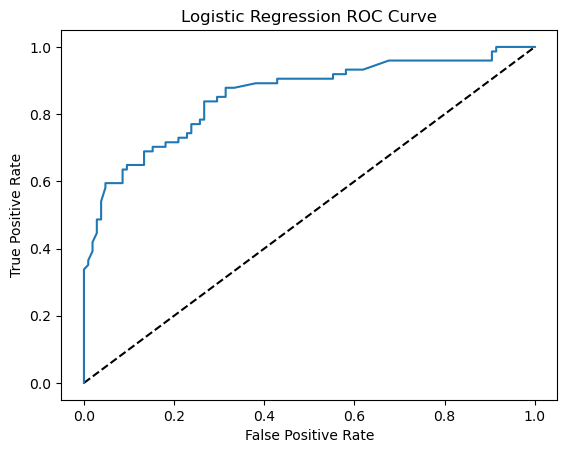

In [41]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

### ROC AUC

In [42]:
print(roc_auc_score(y_test, y_pred_test))

0.7751608751608752


In [43]:
print(confusion_matrix(y_test, y_pred_test))

[[89 16]
 [22 52]]


In [44]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



### Model: KNeighbors algorithm

In [45]:
#knn = KNeighborsClassifier(n_neighbors=15)
knn = KNeighborsClassifier()

In [46]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred = knn.predict(X_test)

In [48]:
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

### Metrics Errors for KNN regression

In [49]:
#print(knn.score(X_test, y_test))
print('KNN Neighbor Accuracy Result: {}'.format(accuracy_score(y_test, y_pred)))

KNN Neighbor Accuracy Result: 0.7932960893854749


In [50]:
MAE = mean_absolute_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print('Mean Absolute Error: {}'.format(MAE))
print('Root Mean Sqaured Error: {}'.format(RMSE))

Mean Absolute Error: 0.20670391061452514
Root Mean Sqaured Error: 0.454647017602145


### Predicting KNN Probability

In [51]:
y_pred_prob = knn.predict_proba(X_test)[:, 1]
print(y_pred_prob[0])

0.6


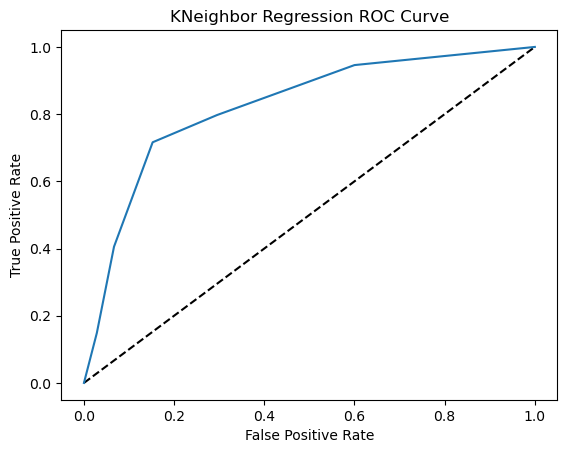

In [52]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNeighbor Regression ROC Curve')
plt.show()

### Varying k Neighbors

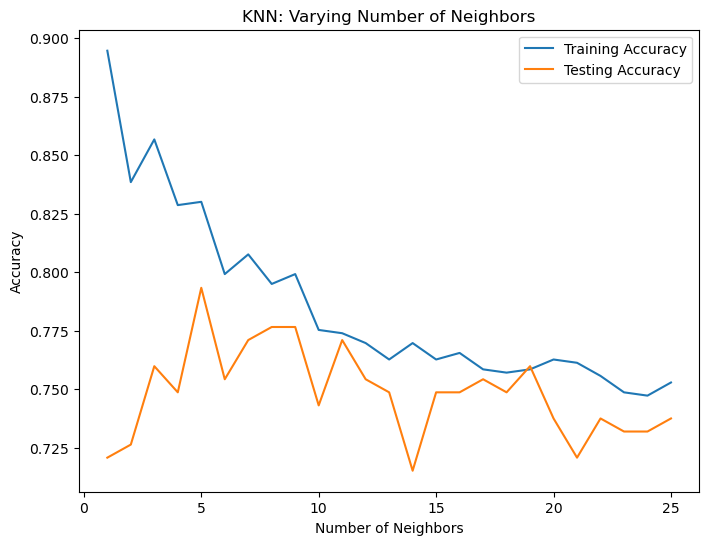

0.2


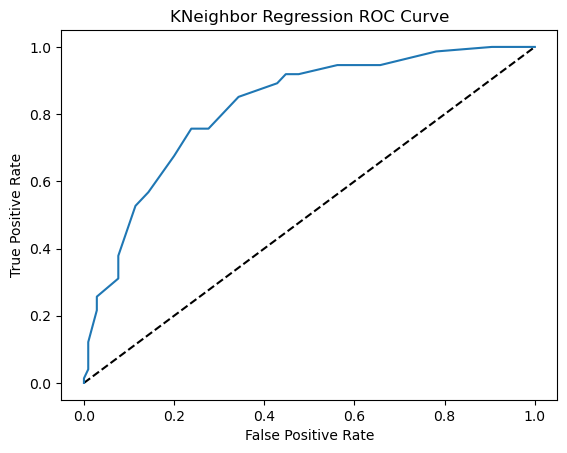

In [53]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neigbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neigbor)
    knn.fit(X_train, y_train)
    train_accuracies[neigbor]= knn.score(X_train, y_train)
    test_accuracies[neigbor] = knn.score(X_test, y_test)

plt.figure(figsize=(8, 6))
plt.plot(neighbors, train_accuracies.values(), label='Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label='Testing Accuracy')
plt.title('KNN: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred_prob = knn.predict_proba(X_test)[:, 1]
print(y_pred_prob[0])

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNeighbor Regression ROC Curve')
plt.show()

* Training accuracy decrease as the number of neighbors get larger and test accuracy increases until it reaches k = 5 where it started drecreasing as the number of neighbors get larger.
* For the test set, accuracy peaks with 5 neighbors with roughly 0.8 accuracy, suggesting it is the optimal values for our model.

### Check for the best model

In [54]:
best_model = pd.DataFrame({
    'Models': ['LR', 'KNN'],
    'Accuracy': [accuracy_score(y_test, y_pred_test),
                 accuracy_score(y_test, y_pred)
                ]
})

In [55]:
best_model

,Models,Accuracy
0,LR,0.787709
1,KNN,0.793296


Text(0.5, 1.0, 'Comparing the Best Model')

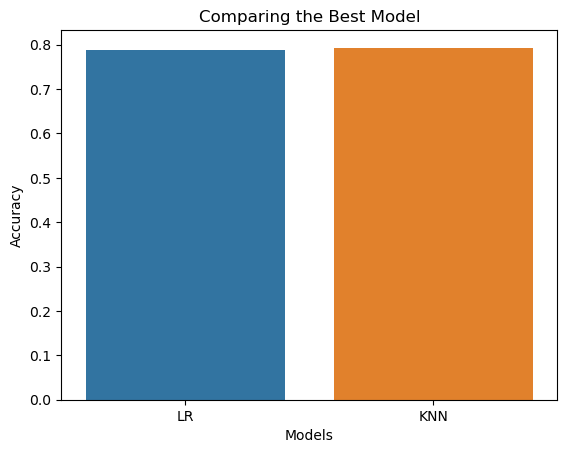

In [56]:
sns.barplot(x = best_model['Models'], y = best_model['Accuracy'])
plt.title('Comparing the Best Model')

### Integrating Different Models into Pipeline

In [57]:
imputer = SimpleImputer()
scaler = StandardScaler()
lr = LogisticRegression()
knn = KNeighborsClassifier()

In [58]:
steps = [('imputer', imputer), ('scaler', scaler), ('lr', lr)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('lr', LogisticRegression())])

In [61]:
y_pred_scaled_lr = pipeline.predict(X_test)
print('Logistic Accuracy Result: {}'.format(accuracy_score(y_test, y_pred_scaled_lr)))

Logistic Accuracy Result: 0.7988826815642458


In [62]:
steps = [('imputer', imputer), ('scaler', scaler), ('knn', knn)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
y_pred_scaled_knn = pipeline.predict(X_test)
print('KNN Accuracy Result: {}'.format(accuracy_score(y_test, y_pred_scaled_knn)))

KNN Accuracy Result: 0.7988826815642458


## Conclusion
* Though there is no much difference in the accuracy of the two models used but KNN gives better accuracy result than the logistic regression 
* Therefore KNN is more reliable and a better choice for predicting titanic survival